<a href="https://colab.research.google.com/github/samreaver/Satellite_Image_prediction/blob/main/Topographical__features_extraction_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -lah '/content/drive/MyDrive/archive satellite image kaggle mapped dataset/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Apr 10 18:54  classes.json
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 1'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 2'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 3'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 4'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 5'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 6'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 7'
drwx------ 2 root root 4.0K Jun 19 14:41 'Tile 8'


In [5]:
rootfolder= '/content/drive/MyDrive/archive satellite image kaggle mapped dataset/'

In [6]:
Datasetn = "Semantic segmentation dataset"

In [7]:
images = []
for path, subdirs, files in os.walk(os.path.join(rootfolder, Datasetn)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
   images = os.listdir(path)
  for i , image_name in enumerate(images):
      if (image_name.endswith('.png')):
        #print(image_name)
        a = True

In [8]:
  image_patch_size = 256

In [9]:
image = cv2.imread(f'{rootfolder}/{Datasetn}/Tile 2/images/image_part_001.jpg',1)


In [10]:
#image = np.array(image)

In [11]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [12]:
len(image_patches)

2

In [13]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [14]:
minmaxscaler = MinMaxScaler()

In [15]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [16]:
image_y[0].shape

(256, 256, 3)

In [17]:
print(type(image))

<class 'numpy.ndarray'>


In [18]:
type(Image.fromarray(image))

PIL.Image.Image

In [19]:
image.shape

(544, 509, 3)

In [20]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [21]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{rootfolder}/{Datasetn}/Tile {tile_id}/{image_type}/image_part_{image_id:03d}.{image_extension}',1)
      if image is not None:
       if image_type == 'masks':
           image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       #print(image.shape)  #644, 797, 3
       size_x = (image.shape[1]//image_patch_size)*image_patch_size
       size_y = (image.shape[0]//image_patch_size)*image_patch_size
       #print("{} --- {} - {}".format(image.shape, size_x, size_y))
       image = Image.fromarray(image)
       image = image.crop((0,0, size_x, size_y))
       image = np.array(image)
       patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
       #print(len(patched_images))
       for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [22]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [23]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [24]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

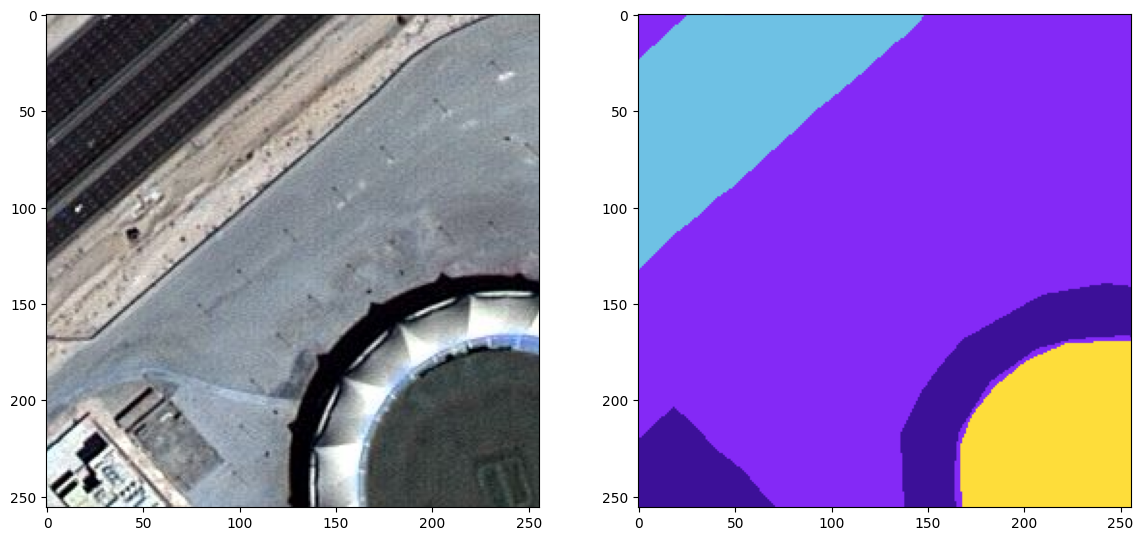

In [25]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [26]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [27]:
label = individual_patched_mask

In [28]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [29]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [30]:
print(len(labels))

945


In [31]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
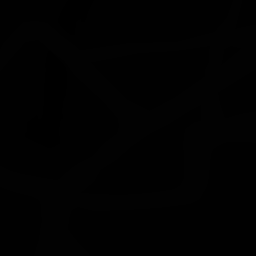

In [32]:
labels[3]

In [33]:
labels = np.expand_dims(labels, axis=3)

In [34]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [35]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

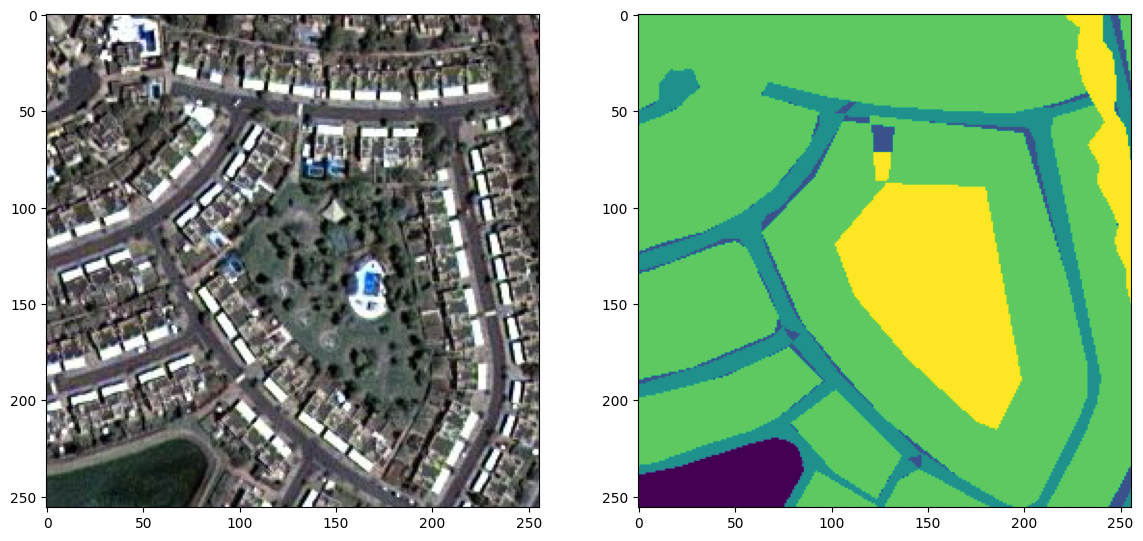

In [36]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
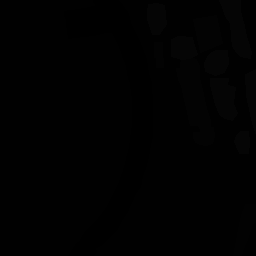

In [37]:
labels[0][:,:,0]

In [38]:
total_classes = len(np.unique(labels))

In [39]:
total_classes

6

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [42]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [43]:
master_trianing_dataset = image_dataset

In [44]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [48]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [49]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


**Deep Learning**

In [50]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, Input
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [51]:
from keras import backend as K

In [52]:
def jaccardcoef(t, p):
  t_flatten = K.flatten(t)
  p_flatten = K.flatten(p)
  intersection = K.sum(t_flatten * p_flatten)
  coefficient =  (intersection+1.0)/(K.sum(t_flatten)+K.sum(p_flatten)-intersection+1)
  return coefficient

In [53]:
def mu_net_model(classes=5, img_height = 256, img_width = 256, img_channels = 3):
  inputs = Input((img_height, img_width, img_channels))
  input_source = inputs
  c1 = Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(input_source)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


  u6 = Conv2DTranspose(128,(2,2), strides=(2,2), padding='same')(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)


  u7 = Conv2DTranspose(64,(2,2), strides=(2,2), padding='same')(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32,(2,2), strides=(2,2), padding='same')(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16,(2,2), strides=(2,2), padding='same')(c8)
  u9 = concatenate([u9, c1])
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  output = Conv2D(classes, (1,1), activation='softmax')(c9)
  model = Model(inputs=[inputs], outputs=[output])
  return model


In [54]:
metrics = ["accuracy", jaccardcoef]

In [55]:
def my_model():
 return mu_net_model(classes=total_classes,
                          img_height=image_height,
                          img_width=image_width,
                          img_channels=image_channels)





In [56]:
 models = my_model()

In [57]:
#models.get_config()

In [58]:
!pip install segmentation-models
!pip install tensorflow
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import tensorflow as tf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.6 MB/s eta 0:00:00
Segmentation Models: using `tf.keras` framework.


In [59]:
w = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [60]:
dl = sm.losses.DiceLoss(class_weights = w)
fl = sm.losses.CategoricalFocalLoss()
tl = dl + (1 * fl)

In [61]:
import tensorflow as tf
tf.keras.backend.clear_session()
models.compile(optimizer="adam", loss=tl, metrics=metrics)
models.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
modes_history = models.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=50,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/50
51/51 [==============================] - 56s 428ms/step - loss: 1.0041 - accuracy: 0.5194 - jaccardcoef: 0.2431 - val_loss: 0.9938 - val_accuracy: 0.6165 - val_jaccardcoef: 0.2720
Epoch 2/50
51/51 [==============================] - 11s 215ms/step - loss: 0.9783 - accuracy: 0.6762 - jaccardcoef: 0.3685 - val_loss: 0.9708 - val_accuracy: 0.7039 - val_jaccardcoef: 0.4425
Epoch 3/50
51/51 [==============================] - 11s 222ms/step - loss: 0.9617 - accuracy: 0.7211 - jaccardcoef: 0.4675 - val_loss: 0.9729 - val_accuracy: 0.6722 - val_jaccardcoef: 0.4537
Epoch 4/50
51/51 [==============================] - 11s 223ms/step - loss: 0.9537 - accuracy: 0.7410 - jaccardcoef: 0.5002 - val_loss: 0.9814 - val_accuracy: 0.6560 - val_jaccardcoef: 0.4485
Epoch 5/50
51/51 [==============================] - 11s 222ms/step - loss: 0.9496 - accuracy: 0.7511 - jaccardcoef: 0.5182 - val_loss: 0.9862 - val_accuracy: 0.6295 - val_jaccardcoef: 0.4271
Epoch 6/50
51/51 [===========================

In [ ]:
history_a = modes_history

In [ ]:
history_a.history

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
jaccardcoef = history_a.history['jaccardcoef']
val_jacc_coef = history_a.history['val_jaccardcoef']

epochs = range(1, len(jaccardcoef) + 1)
plt.plot(epochs, jaccardcoef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccardcoef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [67]:
modes_history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [68]:
y_pred = models.predict(X_test)

5/5 [==============================] - 5s 61ms/step


In [69]:
len(y_pred)

142

In [70]:
y_pred

array([[[[1.93419345e-02, 5.95275164e-01, 1.14518583e-01,
          1.78165898e-01, 8.49521458e-02, 7.74629368e-03],
         [5.65595087e-03, 7.06465483e-01, 6.94738254e-02,
          1.68390647e-01, 4.75918986e-02, 2.42216885e-03],
         [4.67441743e-03, 6.37882113e-01, 9.09602791e-02,
          2.22442612e-01, 4.21099663e-02, 1.93063356e-03],
         ...,
         [1.24932826e-02, 7.37722278e-01, 9.09985453e-02,
          1.62970722e-02, 1.41302079e-01, 1.18669646e-03],
         [1.92614198e-02, 7.18489826e-01, 9.32713673e-02,
          2.74807792e-02, 1.38694912e-01, 2.80160271e-03],
         [6.65505752e-02, 5.49521327e-01, 1.17758751e-01,
          6.62209839e-02, 1.86607853e-01, 1.33405374e-02]],

        [[6.13154611e-03, 6.43862307e-01, 6.98176771e-02,
          2.28626251e-01, 4.85146791e-02, 3.04753939e-03],
         [8.76744685e-04, 7.39374280e-01, 2.90097576e-02,
          2.11844891e-01, 1.83533877e-02, 5.40880486e-04],
         [4.57243907e-04, 6.45307958e-01, 4.1247

In [71]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [72]:
len(y_pred_argmax)

142

In [73]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 4, 4, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [74]:
y_test_argmax = np.argmax(y_test, axis=3)

In [75]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [77]:
import random

In [78]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = models.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 1s/step


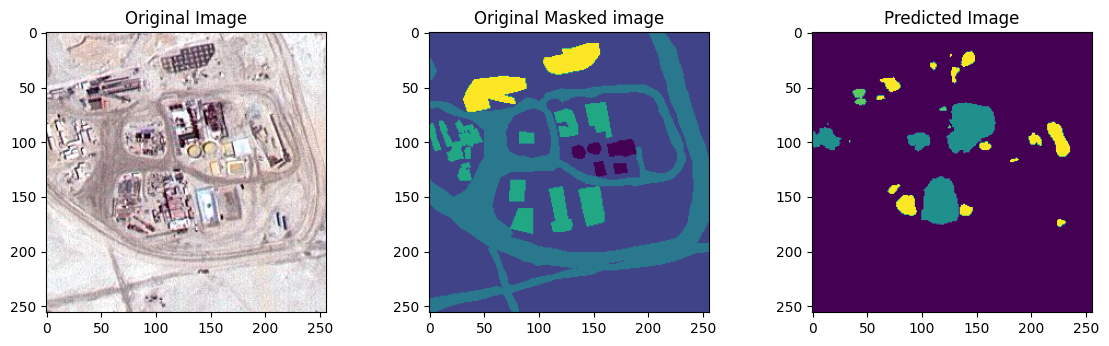

In [79]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [80]:
models.save("Topographical_features_extraction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jun 19 15:31 .
drwxr-xr-x 1 root root 4.0K Jun 19 15:12 ..
drwxr-xr-x 4 root root 4.0K Jun 14 17:38 .config
drwx------ 5 root root 4.0K Jun 19 15:14 drive
drwxr-xr-x 1 root root 4.0K Jun 14 17:39 sample_data
-rw-r--r-- 1 root root  23M Jun 19 15:31 Topographical_features_extraction.h5


In [82]:
pip install flask

In [83]:
from keras.models import load_model

In [84]:
models.loss.name

'dice_loss_plus_1focal_loss'

In [85]:
my_model =  load_model('/content/Topographical_features_extraction.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': tl,
                                          'jaccardcoef': jaccardcoef}))

Prediction

In [86]:
i1 = Image.open('/content/drive/MyDrive/Screenshot 2024-06-19 185640.png')

In [87]:
i2 = Image.open('/content/drive/MyDrive/Screenshot 2024-06-19 185830.png')

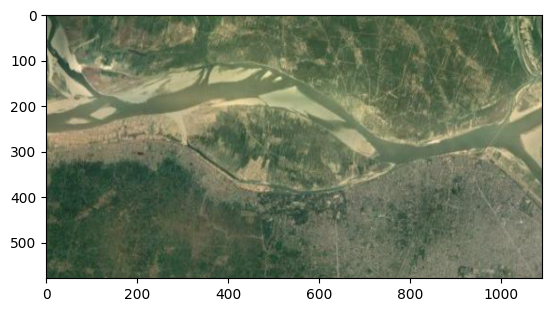

In [88]:
plt.imshow(i1)

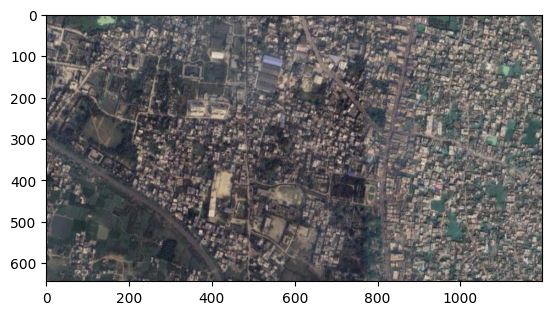

In [89]:
plt.imshow(i2)

In [99]:
def img_processing(img):
  img = img.resize((256,256))
  img = np.array(img)
  if img.shape[-1]==4:
    img = img[:,:,:3]
  img = np.expand_dims(img, 0)
  return img
processed_img1 = img_processing(i1)
processed_img2 = img_processing(i2)

In [100]:
prediction = my_model.predict(processed_img1)


1/1 [==============================] - 0s 283ms/step


In [104]:
output = np.argmax(processed_img1, axis=3)
output = output[0,:,:]

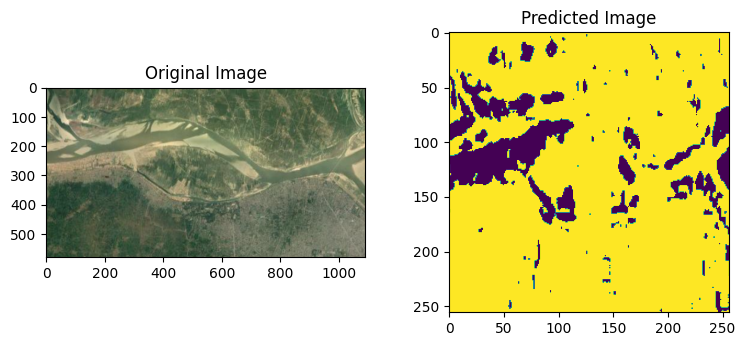

In [105]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(i1)
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(output)
